In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('bottle.csv',low_memory=False)
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.isna().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [23]:
df.shape

(864863, 74)

In [24]:
#In our problem we only need salinity and temperature so lets make new dataframe of out original dataset
df1 = df[["T_degC","Salnty"]]
df1

,T_degC,Salnty
0,10.500,33.4400
1,10.460,33.4400
2,10.460,33.4370
3,10.450,33.4200
4,10.450,33.4210
...,...,...
864858,18.744,33.4083
864859,18.744,33.4083
864860,18.692,33.4150
864861,18.161,33.4062


In [25]:
df1.isna().sum()

T_degC    10963
Salnty    47354
dtype: int64

In [26]:
#Handling missing Data
df1['T_degC'].fillna(df1['T_degC'].mean(),inplace=True)

C:\Users\Dheeru\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [27]:
df1['Salnty'].fillna(df1['Salnty'].mean(),inplace=True)

In [28]:
df1.isna().sum()

T_degC    0
Salnty    0
dtype: int64

In [29]:
df1.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [30]:
df1.dtypes

T_degC    float64
Salnty    float64
dtype: object

In [31]:
df1.corr()

,T_degC,Salnty
T_degC,1.000000,-0.489967
Salnty,-0.489967,1.000000


<AxesSubplot:xlabel='Salnty', ylabel='T_degC'>

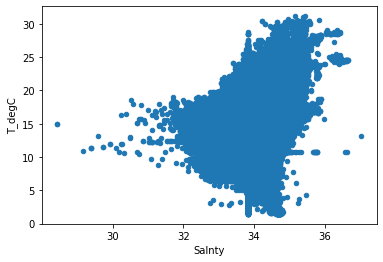

In [32]:
#Plot the correlation between salinity and temperature. 
df1.plot.scatter(x="Salnty",y="T_degC")

In [33]:
#Divide dataset into feature and target
X = np.array(df1['Salnty']).reshape(-1,1)
y = np.array(df1['T_degC']).reshape(-1,1)

In [34]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [35]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
#Build a Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
#Display the coefficient and intercept of the Regression model
model.score(X, y)

-275.8493898324785

In [40]:
model.coef_

array([[-2.0701547]])

In [41]:
model.intercept_

array([10.79691195])

In [42]:
y_pred = model.predict(X_test)

In [43]:
#Evaluate the Regression model using MSE and R2(R-Squared) value. 
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,y_pred)

0.23597712987710773

In [44]:
mean_squared_error(y_test,y_pred)

13.603762405636333

<h2> In Lab 2 </h2>

In [3]:
data = pd.read_csv('TSLA.csv')
data

,Date,Open,High,Low,Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
2411,28-01-2020,568.489990,576.809998,558.080017,566.900024,11788500
2412,29-01-2020,575.690002,589.799988,567.429993,580.989990,17801500
2413,30-01-2020,632.419983,650.880005,618.000000,640.809998,29005700
2414,31-01-2020,640.000000,653.000000,632.520020,650.570007,15719300


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2416 non-null   object 
 1   Open    2416 non-null   float64
 2   High    2416 non-null   float64
 3   Low     2416 non-null   float64
 4   Close   2416 non-null   float64
 5   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 113.4+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


In [6]:
data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
#Perform essential Data Cleaning. 
data.drop('Date', axis='columns', inplace=True)

KeyError: "['Date'] not found in axis"

In [10]:
# Separate the dependent and independent variables
X = np.array(data.loc[:,["Open","Low","High","Volume"]])
y = np.array(data["Close"]).reshape(-1,1)
X

array([[1.90000000e+01, 1.75400010e+01, 2.50000000e+01, 1.87663000e+07],
       [2.57900010e+01, 2.32999990e+01, 3.04200000e+01, 1.71871000e+07],
       [2.50000000e+01, 2.02700000e+01, 2.59200000e+01, 8.21880000e+06],
       ...,
       [6.32419983e+02, 6.18000000e+02, 6.50880005e+02, 2.90057000e+07],
       [6.40000000e+02, 6.32520020e+02, 6.53000000e+02, 1.57193000e+07],
       [6.73690002e+02, 6.73520020e+02, 7.86140015e+02, 4.70650000e+07]])

In [11]:
y

array([[ 23.889999],
       [ 23.83    ],
       [ 21.959999],
       ...,
       [640.809998],
       [650.570007],
       [780.      ]])

In [12]:
#Split the data set into Test and Train data set. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [14]:
#Build a Linear Regression Model 

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)


LinearRegression()

In [19]:
#Display the coefficients and intercept of the Regression model
lr.coef_

array([[-75.31914032,  84.51707252, 110.14589792,  -0.12670467]])

In [20]:
lr.intercept_

array([187.12472581])

In [22]:
# Evaluate the Regression model using MSE and R2(R-Squared)
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.9996956321109857

In [23]:
mean_squared_error(y_test,y_pred)

4.256936157892652

<h2>Post Lab </h2>

In [35]:
post = pd.read_csv('advertising.csv')
post

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [36]:
post.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [40]:
X = np.array(post.iloc[:,0])
y = np.array(post.iloc[:,-1])

In [42]:
from scipy.stats import linregress
linregress(X,y)

LinregressResult(slope=0.05546477046955879, intercept=6.974821488229903, rvalue=0.9012079133023305, pvalue=7.927911625322733e-74, stderr=0.0018955511780402424, intercept_stderr=0.32255348485240154)